In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

In [39]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear="
years = [2019, 2023]
file_names = [f"checkouts{year}_file.csv" for year in years]

In [40]:
for year, file_name in zip(years, file_names):
    urllib.request.urlretrieve(f"{url}{year}&$limit=10000", file_name)

In [41]:
checkouts19_df = pd.read_csv("checkouts2019_file.csv")
checkouts23_df = pd.read_csv("checkouts2023_file.csv")

In [55]:
mediatype19_df = checkouts19_df["materialtype"].value_counts()
mediatype19_df.to_csv("materialtype19.csv")
keep_col19 = ["BOOK", "EBOOK", "AUDIOBOOK", "VIDEODISC", "SOUNDDISC", "MUSIC"]
mediatype19_df = mediatype19_df[keep_col19]
mediatype19_df

materialtype
BOOK         4733
EBOOK        2500
AUDIOBOOK    1032
VIDEODISC     829
SOUNDDISC     838
MUSIC          21
Name: count, dtype: int64

In [56]:
mediatype23_df = checkouts23_df["materialtype"].value_counts()
mediatype23_df.to_csv("materialtype23.csv")
keep_col23 = ["BOOK", "EBOOK", "AUDIOBOOK", "VIDEODISC", "SOUNDDISC", "MUSIC"]
mediatype23_df = mediatype23_df[keep_col23]
mediatype23_df

materialtype
BOOK         3510
EBOOK        3651
AUDIOBOOK    1753
VIDEODISC     535
SOUNDDISC     505
MUSIC          10
Name: count, dtype: int64

In [57]:
# Zusammenführen der beiden Tabellen

mediatype = pd.concat([mediatype19_df, mediatype23_df], axis=1, ignore_index=True)
mediatype.columns = [str(year) for year in years]

Text(0.5, 1.0, 'Ausleihzahlen nach Medienart 2019')

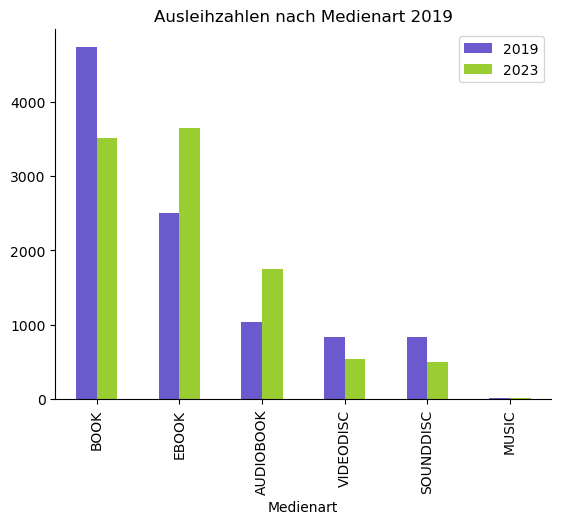

In [59]:
# Balkendiagramm

mediatype.plot(color=['slateblue', 'yellowgreen'], kind="bar")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(["2019", "2023"])
plt.xlabel('Medienart')
plt.title('Ausleihzahlen nach Medienart 2019')

Text(0.5, 1.0, 'Ausleihzahlen nach Medienart 2019')

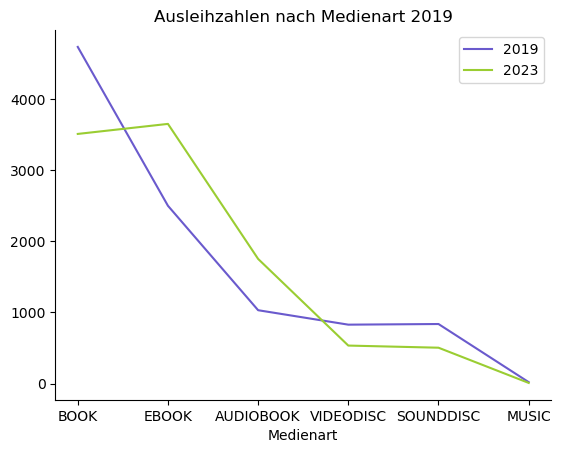

In [58]:
# Liniendiagramm

mediatype.plot(color=['slateblue', 'yellowgreen'])
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(["2019", "2023"])
plt.xlabel('Medienart')
plt.title('Ausleihzahlen nach Medienart 2019')